### **LR DELIVERY TIME PREDICTION**
NAME - VEDA SAMHITA PUDI

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [3]:
df.shape

(175777, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [5]:
df.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,21.843090
std,1.330963,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,8.748712
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.360000
50%,2.000000,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000
75%,4.000000,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,83.520000


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [6]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# COnfirm that the column is updated to datetime type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [7]:
# Convert categorical features to category type

# Check and review categorical columns one at a time
df['market_id'].value_counts().sort_index()
df['store_primary_category'].value_counts().sort_index()
df['order_protocol'].value_counts().sort_index()

# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

# COnfirm that the column is updated to category type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [8]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['time_taken'].value_counts().sort_index()

time_taken
32.0     6297
33.0     4092
34.0     4661
35.0     5241
36.0     5722
         ... 
101.0       5
102.0       1
103.0       1
105.0       1
110.0       1
Name: count, Length: 74, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [10]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_at_hour'] = df['created_at'].dt.hour
df['created_at_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
# 5 and 6 are weekends. We will represent weekend = 1, and rest as weekend = 0
df['isWeekend'] = df['created_at_dayofweek'].apply(lambda x: 1 if(x in [5, 6]) else 0)

# Setting the column type as category
df['isWeekend'] = df['isWeekend'].astype('category')
df['created_at_hour'] = df['created_at_hour'].astype('category')
df['created_at_dayofweek'] = df['created_at_dayofweek'].astype('category')

# Validation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [11]:
# Drop unnecessary columns

# As we have created the 'time_taken' column, we probably dont need 'created_at' and 'actual_delivery_time'
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  created_at_hour           175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [13]:
# Define target variable (y) and features (X)

# Here are the dependent and the feature variables we will use
# y = 'time_taken'
# X = 'market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
#     'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance'

y = df['time_taken']
X = df.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [14]:
# Split data into training and testing sets
#(df_train, df_test) = train_test_split(df, train_size=0.7, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [15]:
# Verify the train and test split data frames
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(123043, 15)
(52734, 15)
(123043,)
(52734,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [16]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_dashers',
    'total_busy_dashers','total_outstanding_orders','distance'
]

categorical_columns = [
    'market_id', 'store_primary_category', 'order_protocol',
    'created_at_hour','created_at_dayofweek','isWeekend'
]


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [17]:
# Plot distributions for all numerical columns

# General data distribution
X_train[numerical_columns].describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
count,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000
mean,3.206082,2697.863625,2.674951,684.784506,1160.434645,44.981177,41.879180,58.276651,21.830150
std,2.745043,1830.338637,1.625552,520.731071,562.955073,34.568806,32.149659,52.689697,8.765038
min,1.000000,0.000000,1.000000,-52.000000,0.000000,-3.000000,-4.000000,-6.000000,0.000000
25%,2.000000,1417.000000,2.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.320000
50%,3.000000,2220.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000
75%,4.000000,3405.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000
max,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,283.000000,83.520000


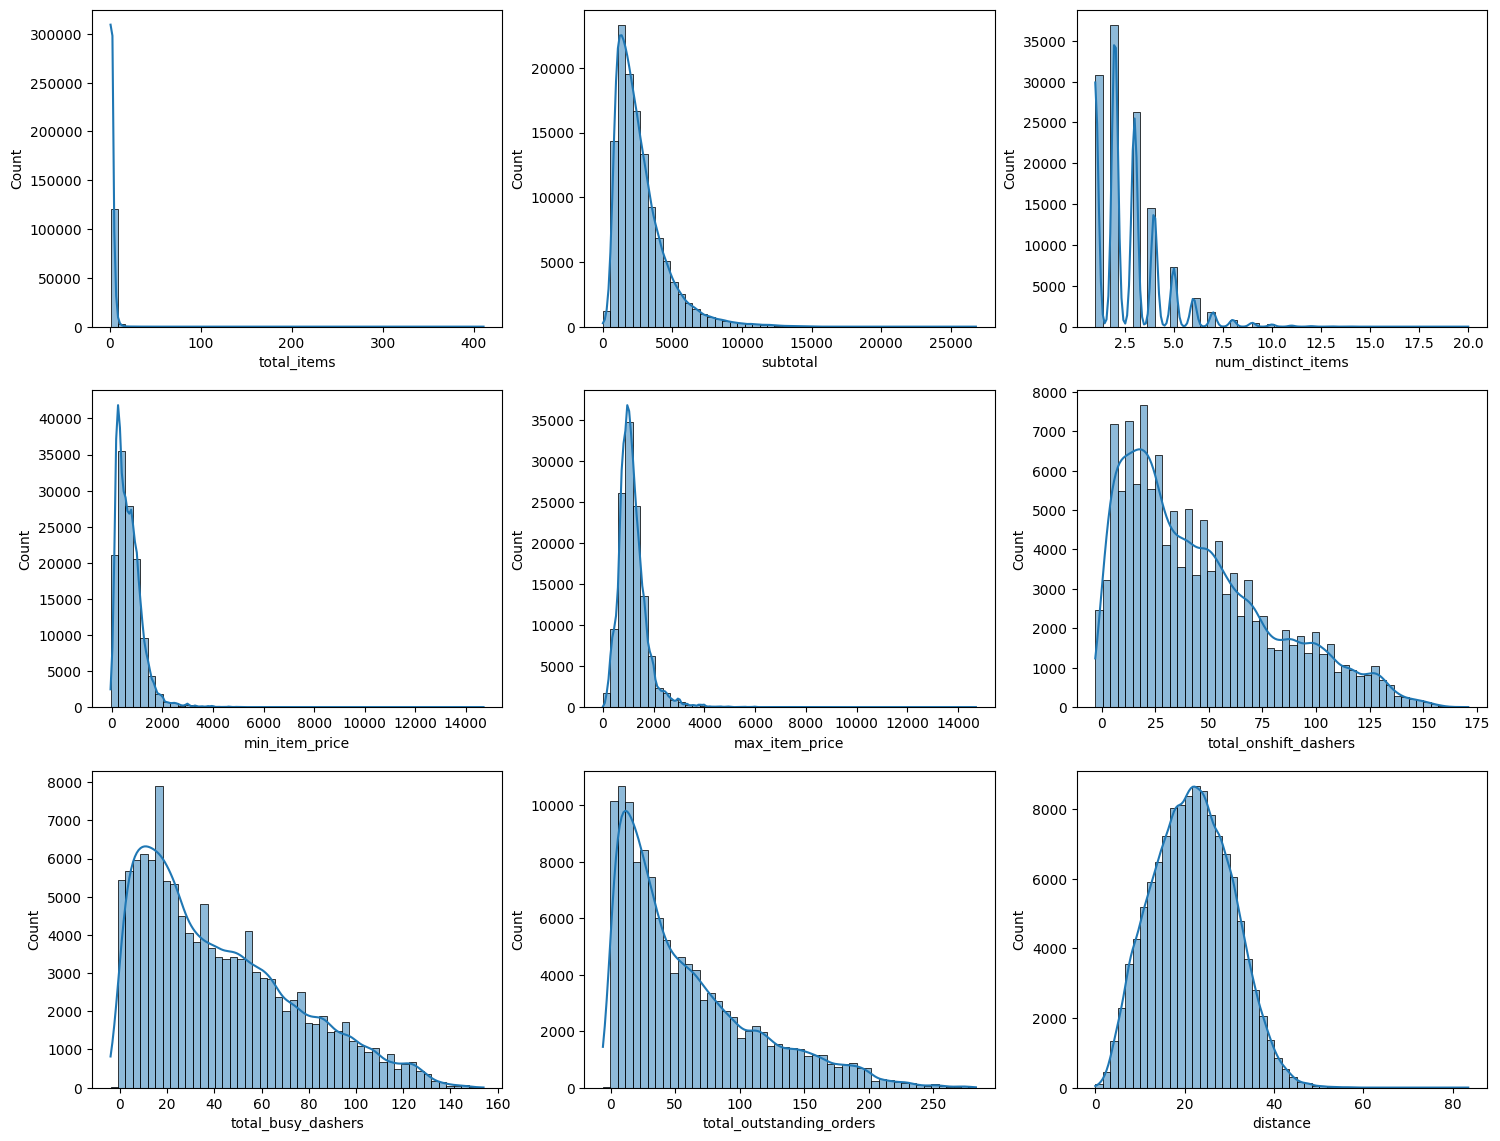

In [18]:
# Use histplot (as distplot is deprecated). There are many columns, so we will have to use a for loop
# There are in all 9 feature variables. So we need 3x3 subplot
index = 1
plt.figure(figsize=(18,14))
for col in numerical_columns:
    plt.subplot(3, 3, index)
    sns.histplot(X_train[col], kde=True, bins=50)
    index = index + 1
plt.show()


In [19]:
# From above figure, there are several numeric values with outliers, example total_items and sub_total

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

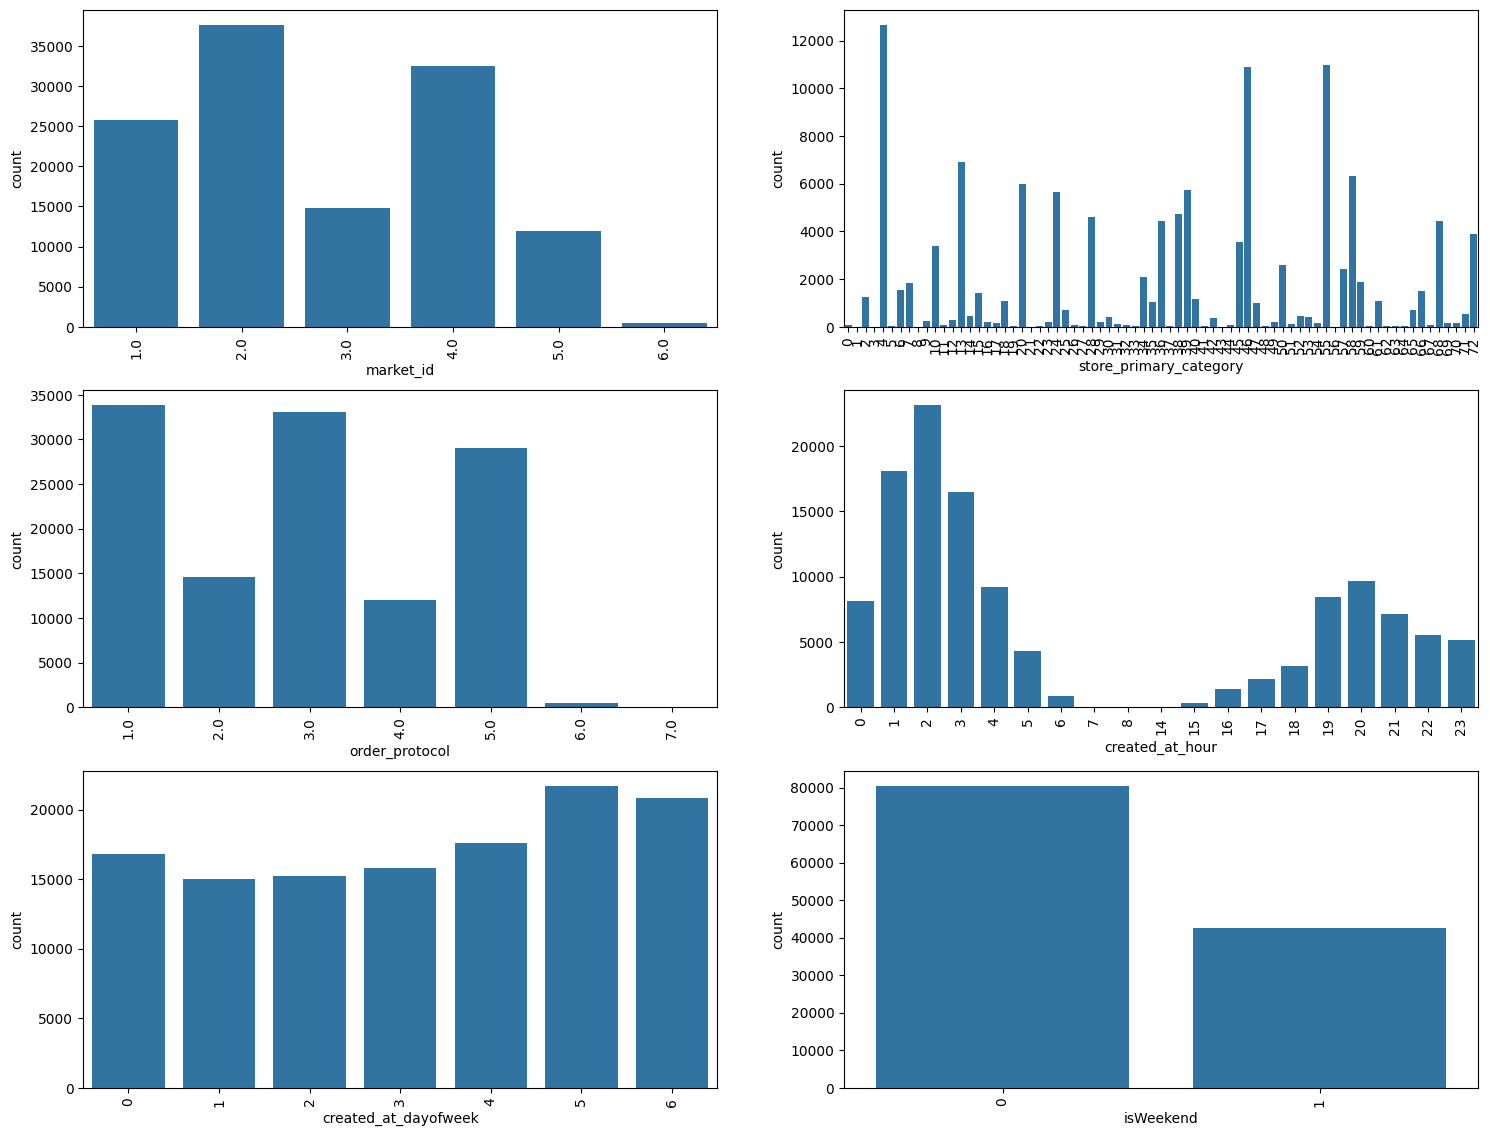

In [20]:
# Distribution of categorical columns

# We cannot use histplot here as its only meant for numerical data. We will have to use countplot.
# There are many columns, so we will have to use a for loop
# There are in all 6 categorical feature variables. So we need 3x2 subplot
# There are too many values in 'store_primary_category', so rotating the x-axis lables for readability
index = 1
plt.figure(figsize=(18,14))
for col in categorical_columns:
    plt.subplot(3, 2, index)
    sns.countplot(x=X_train[col])
    plt.xticks(rotation=90)
    index = index + 1
plt.show()


In [21]:
# From above we can see that
  # created hours - its busy during morning and evenings
  # isWeekend - (cumulatively) More orders on weekdays than weekends
  # created at day of week - more daily orders on Saturdays and Sundays (5 and 6)


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

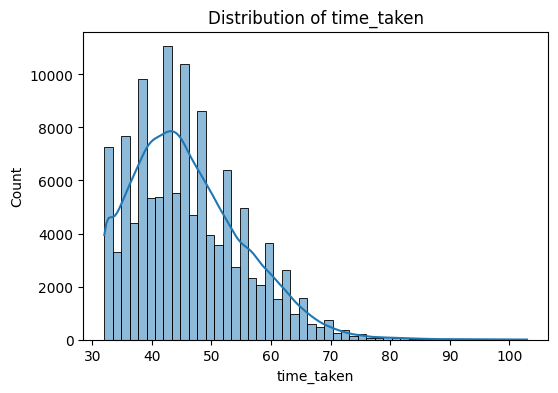

In [22]:
# Distribution of time_taken

plt.figure(figsize=(6,4))
sns.histplot(y_train, kde=True, bins=50)
plt.title('Distribution of time_taken')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

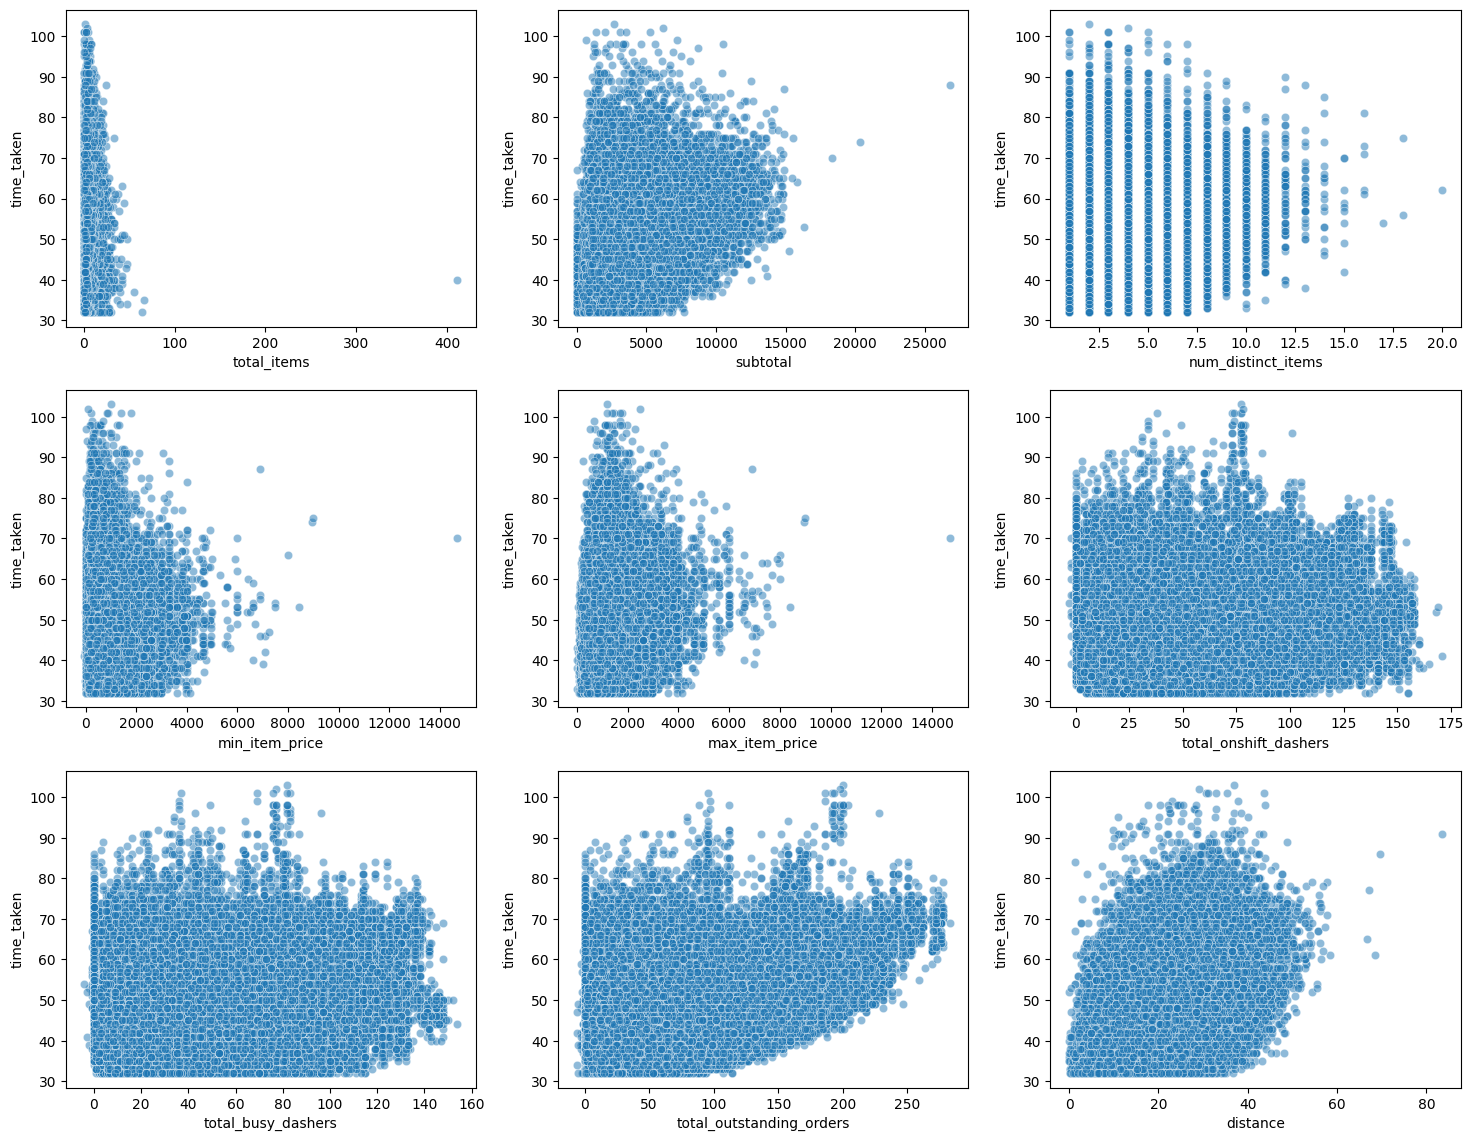

In [23]:
# Scatter plot to visualise the relationship between time_taken and other features

# There are many columns, so we will have to use a for loop
# There are in all 9 numeric feature variables. So we need 3x3 subplot
index = 1
plt.figure(figsize=(18,14))
for col in numerical_columns:
    plt.subplot(3, 3, index)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    index = index + 1
plt.show()


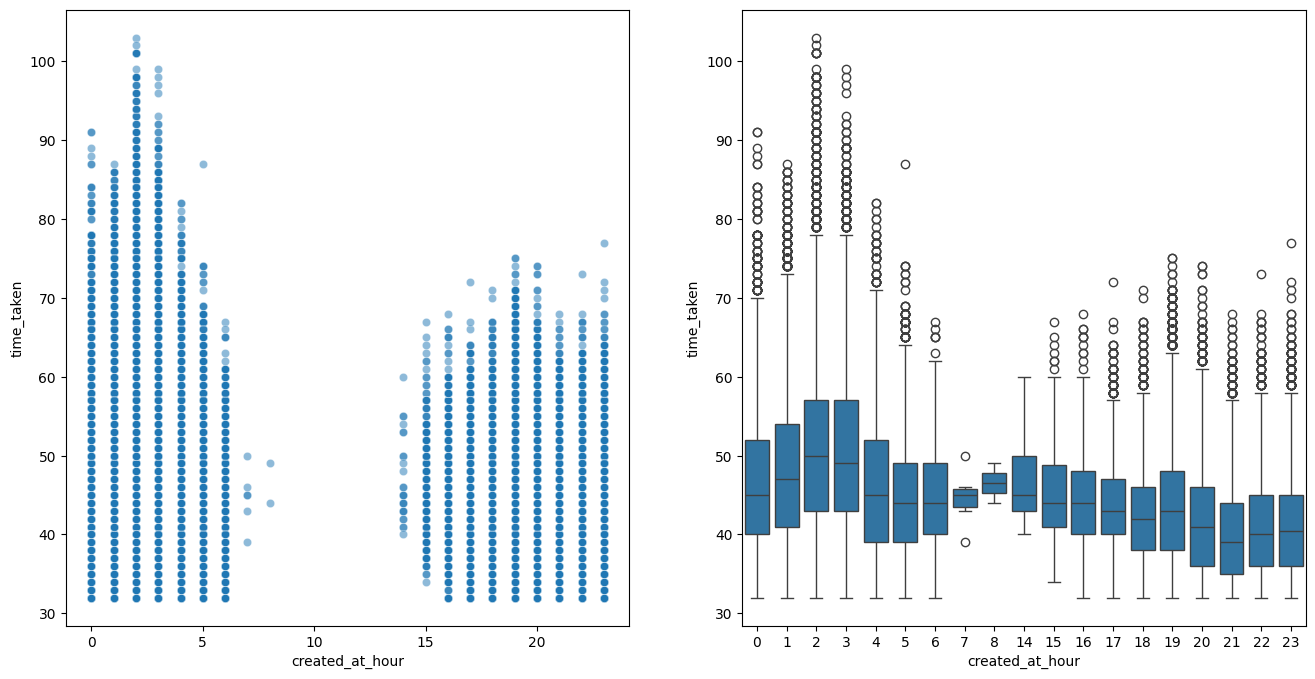

In [24]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x=X_train['created_at_hour'], y=y_train, alpha=0.5)
plt.subplot(1,2,2)
sns.boxplot(x=X_train['created_at_hour'], y=y_train)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

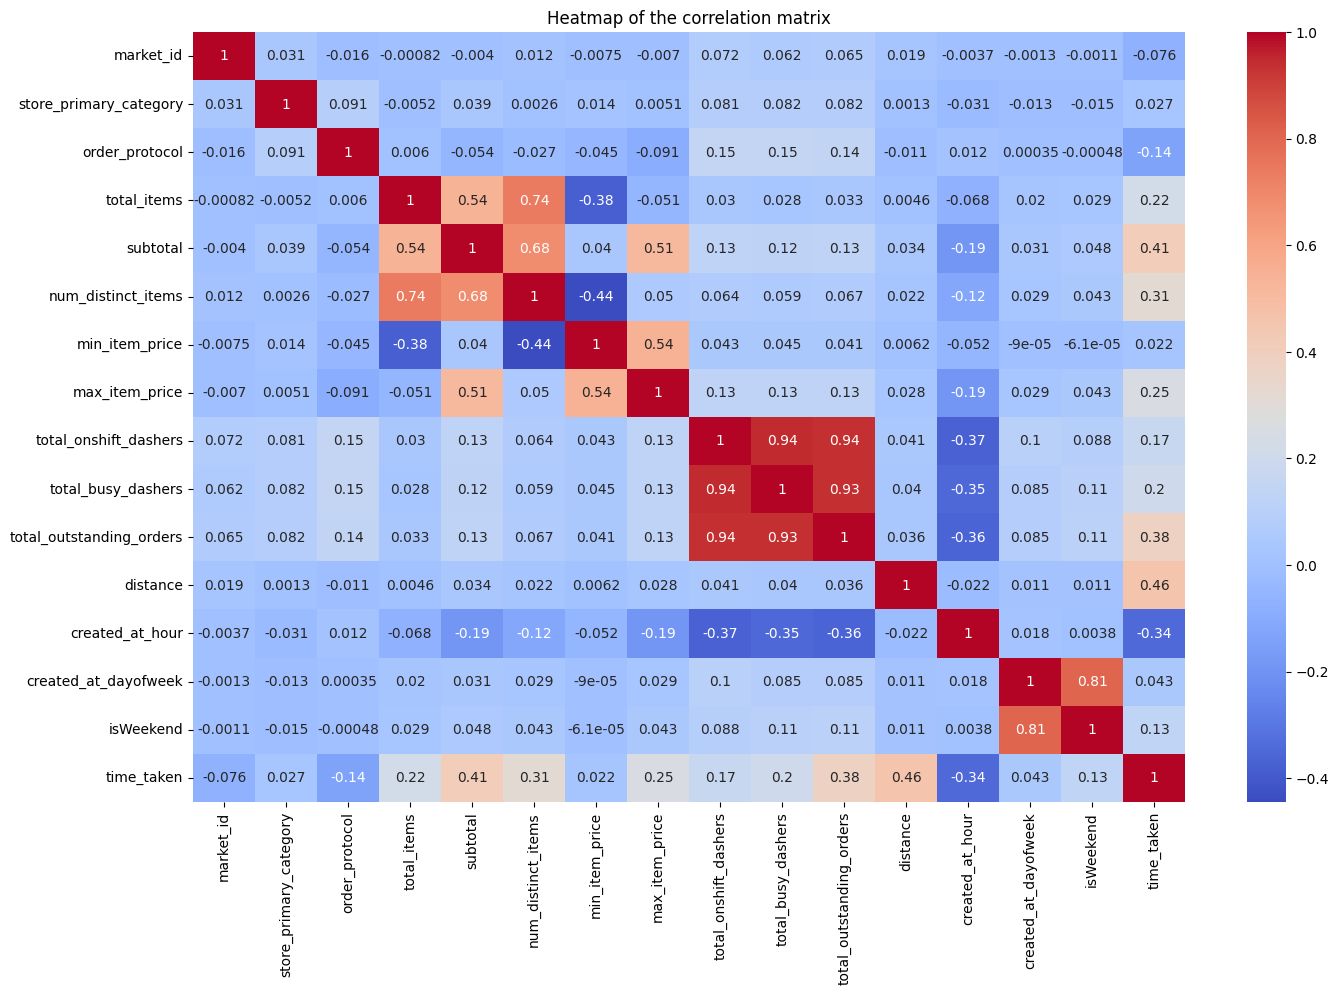

In [25]:
# Plot the heatmap of the correlation matrix

# We need to check correlations between numerical features to identify which variables are strongly related to time_taken
# So we need to get time_taken in the mix
# We will have to create a training data frame with time_taken
df_train = X_train.copy()
df_train['time_taken'] = y_train.copy()

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.title('Heatmap of the correlation matrix')
plt.show()


In [26]:
# Checking correlation between numerical features to time_taken

correlations = df_train[numerical_columns + ['time_taken']].corr()['time_taken']
correlations = correlations.sort_values(key=abs, ascending=False)
print(correlations)

time_taken                  1.000000
distance                    0.459712
subtotal                    0.412878
total_outstanding_orders    0.381642
num_distinct_items          0.313384
max_item_price              0.254671
total_items                 0.219104
total_busy_dashers          0.202562
total_onshift_dashers       0.166812
min_item_price              0.022281
Name: time_taken, dtype: float64


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [27]:
# Drop 3-5 weakly correlated columns from training dataset

# Columns with weakest correlations with the target variable 'time_taken' are
  # total_busy_dashers
  # total_onshift_dashers
  # min_item_price
df_train = df_train.drop('total_busy_dashers', axis=1)
df_train = df_train.drop('total_onshift_dashers', axis=1)
df_train = df_train.drop('min_item_price', axis=1)

# Update the list of numerical colums
numerical_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'max_item_price','total_outstanding_orders','distance'
]


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

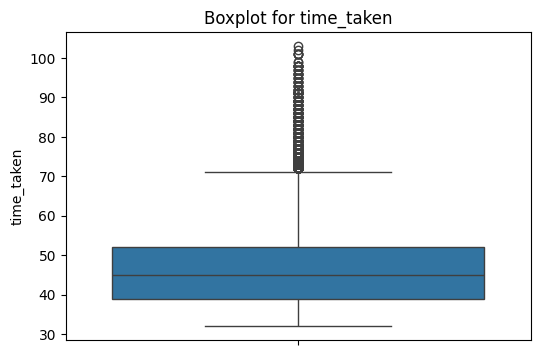

In [28]:
# Boxplot for time_taken
plt.figure(figsize=(6, 4))
sns.boxplot(y_train)
plt.title('Boxplot for time_taken')
plt.show()


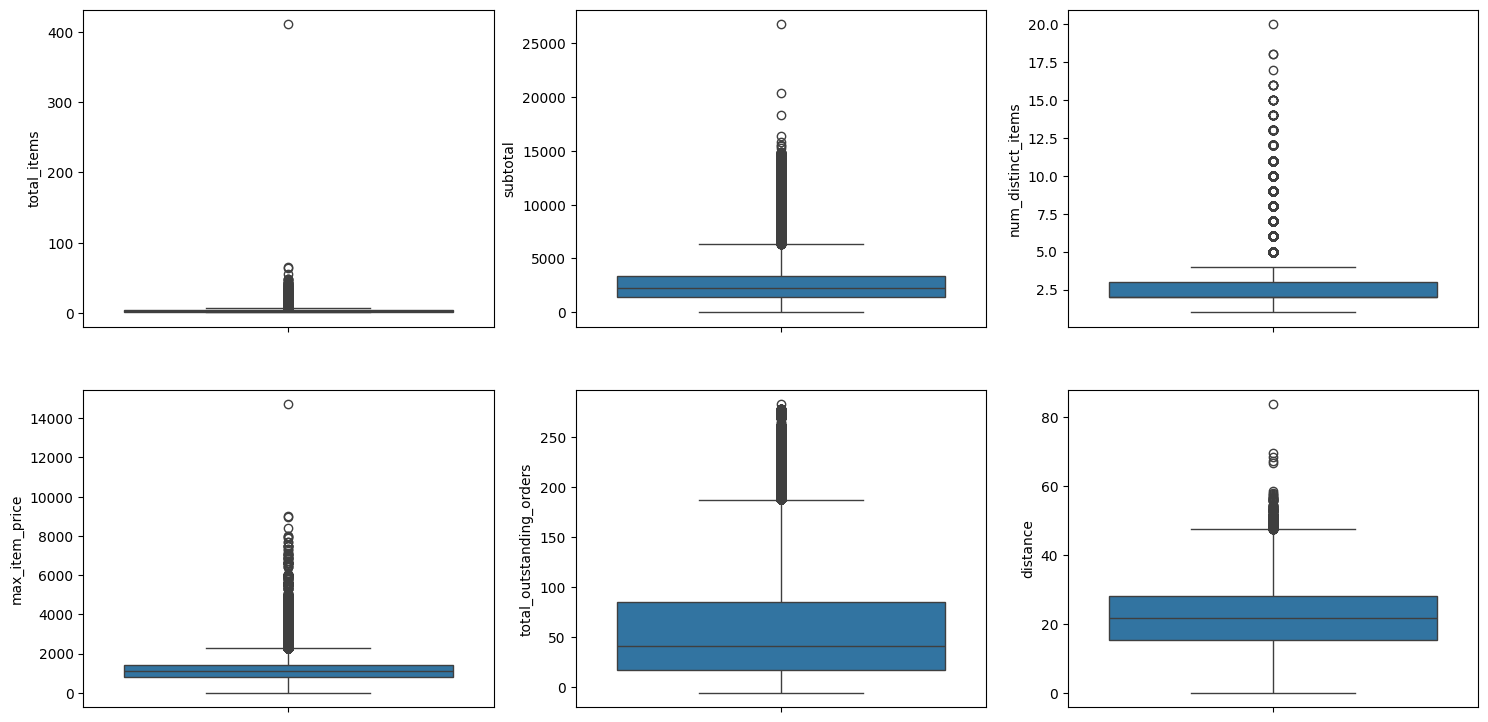

In [29]:
# Boxplot for other numerical features

index = 1
plt.figure(figsize=(18,14))
for col in numerical_columns:
    plt.subplot(3, 3, index)
    sns.boxplot(df_train[col])
    index = index + 1
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [30]:
# Handle outliers


for column_name in numerical_columns:
    Q1 = df_train[column_name].quantile(0.25)
    Q3 = df_train[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_ceiling  = Q1 - (1.5 * IQR)
    higher_ceiling = Q3 + (1.5 * IQR)

    # Keep only values within the bounds
    print(f'{column_name} --> capping values between {lower_ceiling} and {higher_ceiling}')
    df_train = df_train[(df_train[column_name] >= lower_ceiling) & (df_train[column_name] <= higher_ceiling)]


total_items --> capping values between -1.0 and 7.0
subtotal --> capping values between -1405.0 and 6067.0
num_distinct_items --> capping values between -2.0 and 6.0
max_item_price --> capping values between -65.0 and 2239.0
total_outstanding_orders --> capping values between -83.5 and 184.5
distance --> capping values between -3.959999999999999 and 47.239999999999995


In [31]:
df_train.shape

(105442, 13)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [32]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_dashers',
    'total_busy_dashers','total_outstanding_orders','distance'
]

categorical_columns = [
    'market_id', 'store_primary_category', 'order_protocol',
    'created_at_hour','created_at_dayofweek','isWeekend'
]


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

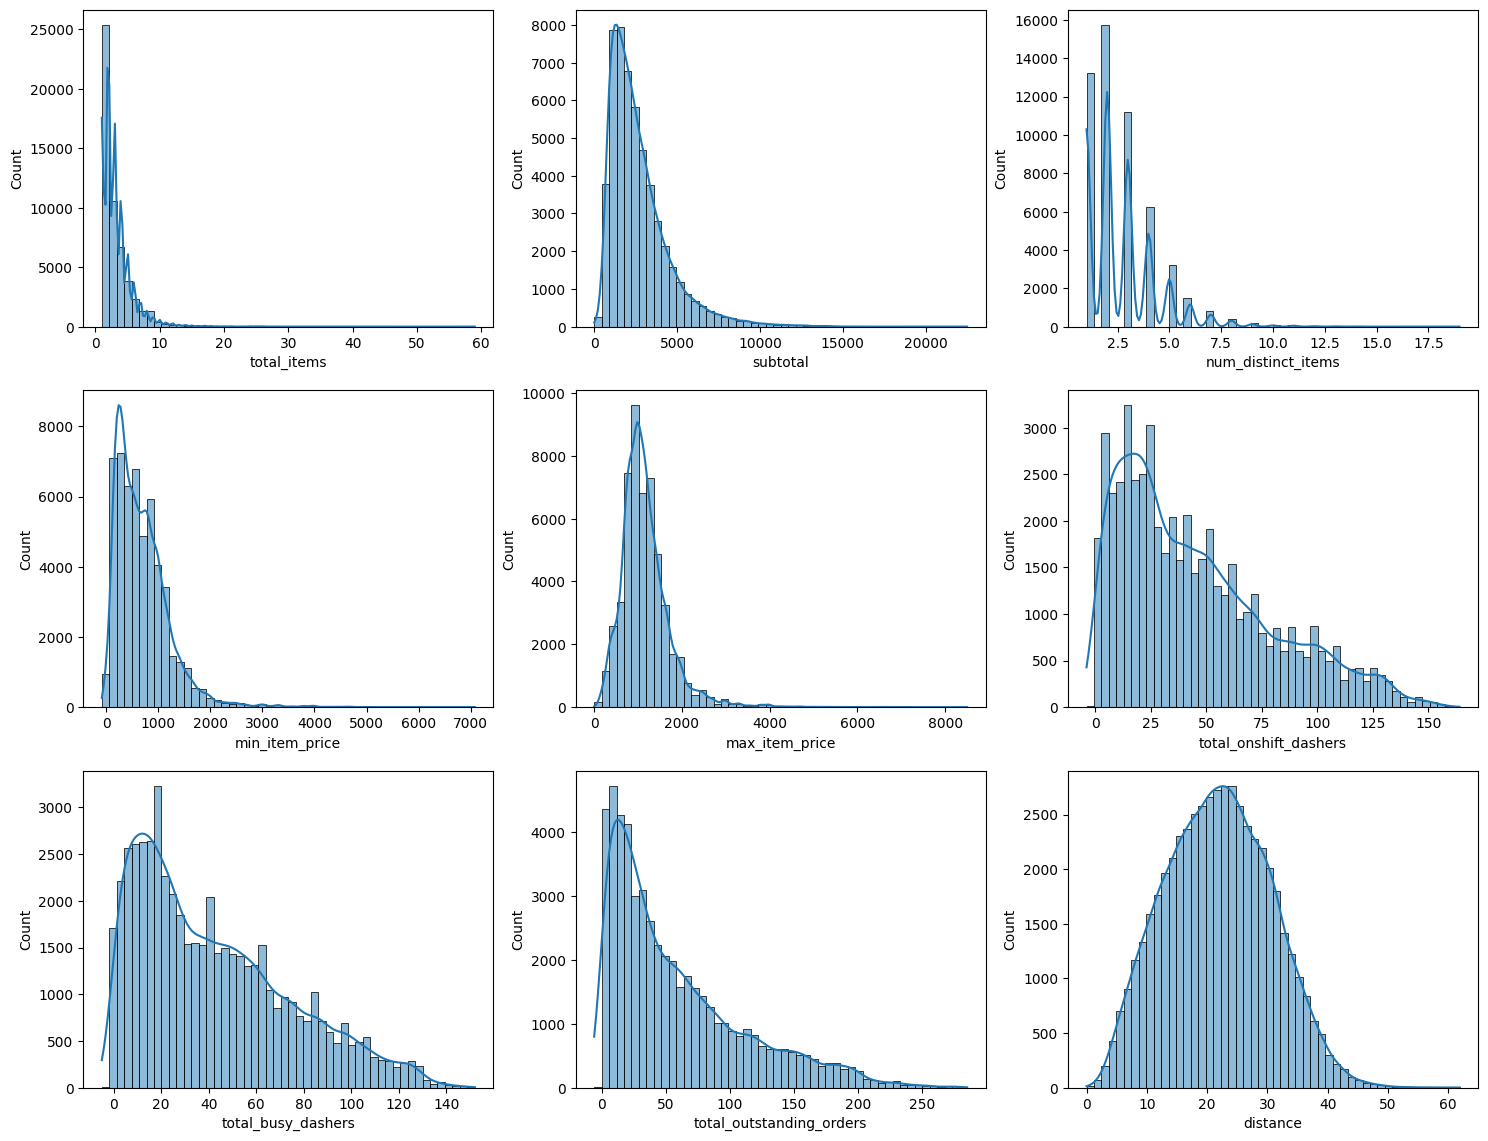

In [33]:
# Plot distributions for all numerical columns

# There are in all 9 feature variables. So we need 3x3 subplot
index = 1
plt.figure(figsize=(18,14))
for col in numerical_columns:
    plt.subplot(3, 3, index)
    sns.histplot(X_test[col], kde=True, bins=50)
    index = index + 1
plt.show()



##### **4.1.2**
Check the distribution of categorical features

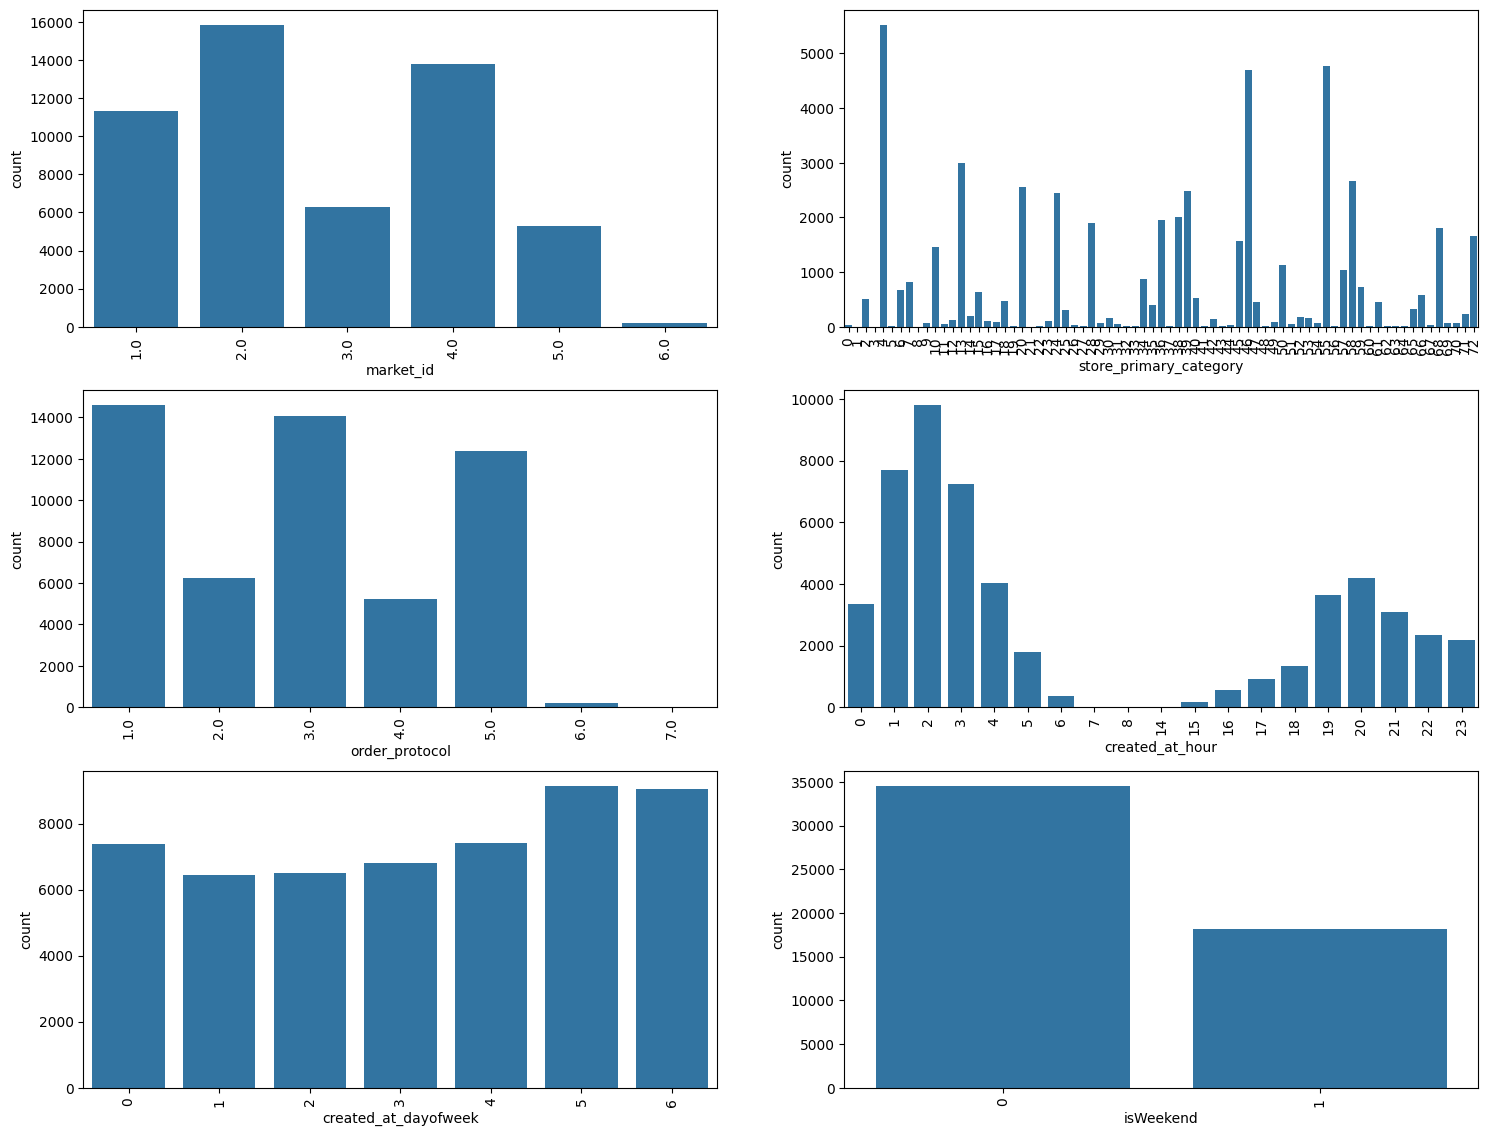

In [34]:
# Distribution of categorical columns

# There are in all 6 categorical feature variables. So we need 3x2 subplot
# There are too many values in 'store_primary_category', so rotating the x-axis lables for readability
index = 1
plt.figure(figsize=(18,14))
for col in categorical_columns:
    plt.subplot(3, 2, index)
    sns.countplot(x=X_test[col])
    plt.xticks(rotation=90)
    index = index + 1
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

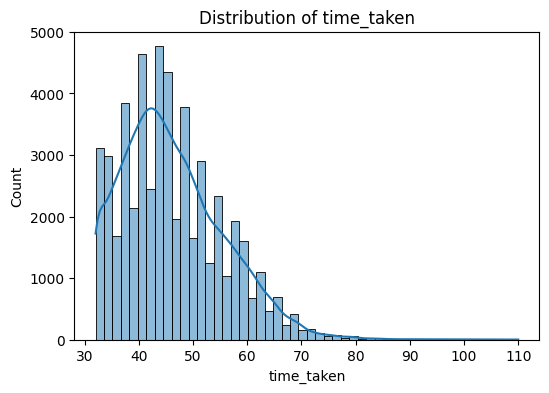

In [35]:
# Distribution of time_taken

plt.figure(figsize=(6,4))
sns.histplot(y_test, kde=True, bins=50)
plt.title('Distribution of time_taken')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

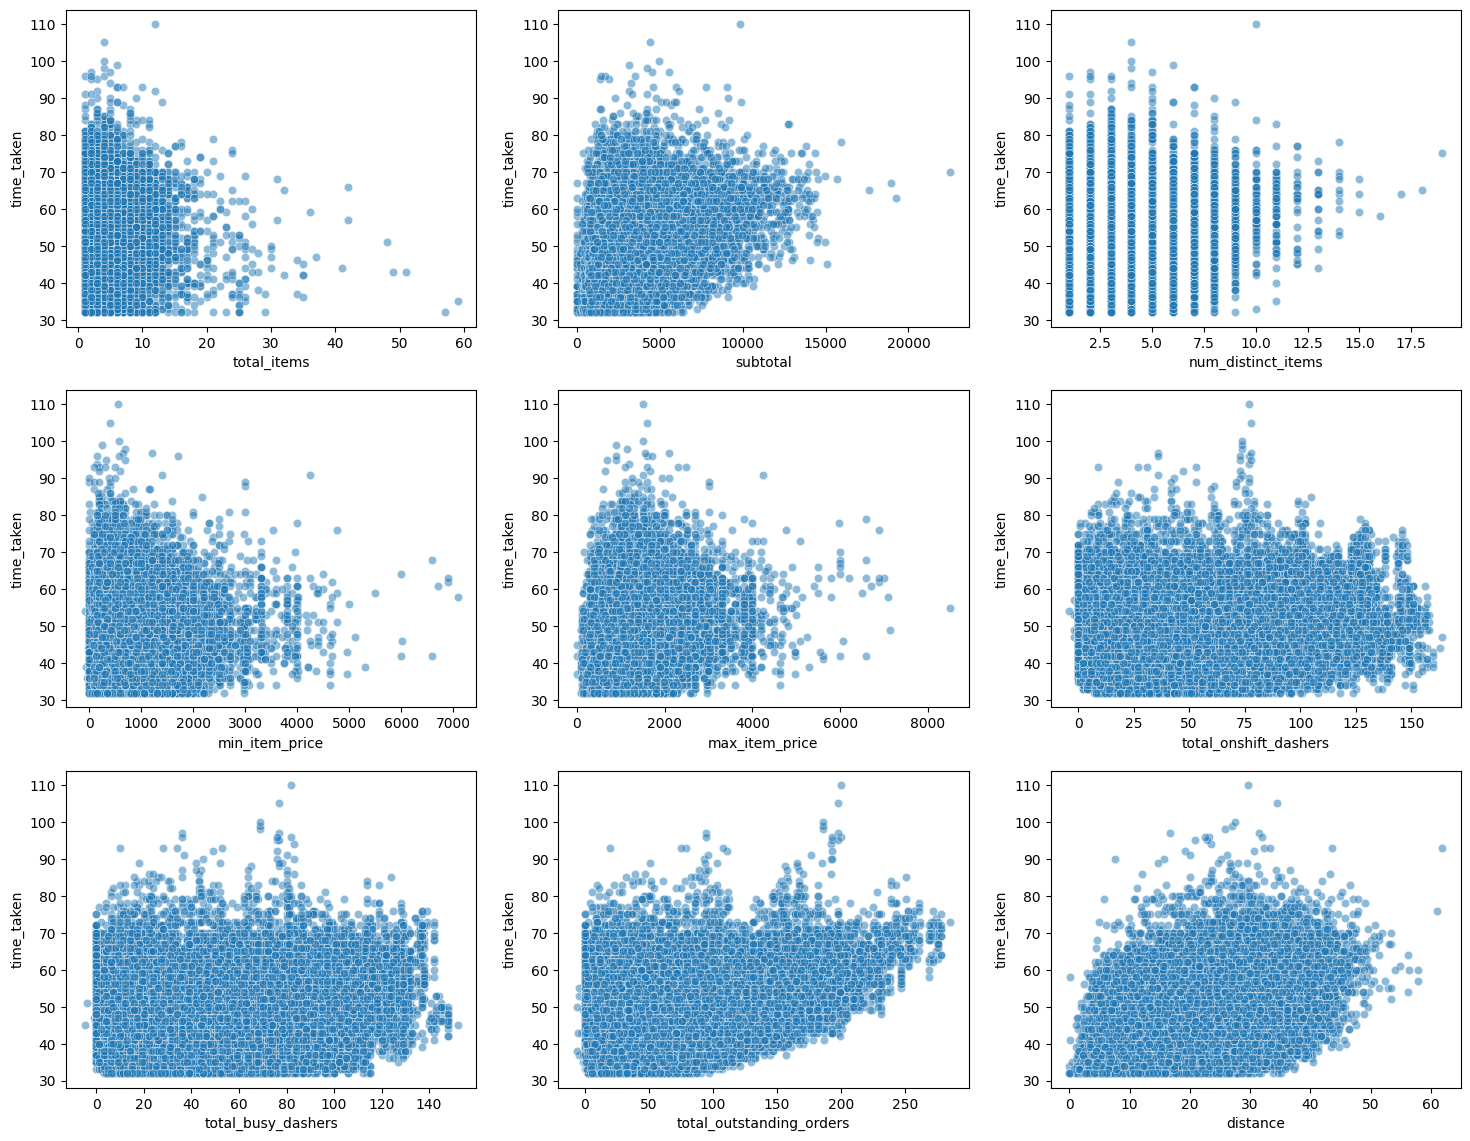

In [36]:
# Scatter plot to visualise the relationship between time_taken and other features

# There are many columns, so we will have to use a for loop
# There are in all 9 numeric feature variables. So we need 3x3 subplot
index = 1
plt.figure(figsize=(18,14))
for col in numerical_columns:
    plt.subplot(3, 3, index)
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5)
    index = index + 1
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [37]:
# Drop the weakly correlated columns from training dataset

# Create test data frame
df_test = X_test.copy()
df_test['time_taken'] = y_test.copy()

# Drop 3-5 weakly correlated columns from training dataset

# Columns with weakest correlations with the target variable 'time_taken' are
  # total_busy_dashers
  # total_onshift_dashers
  # min_item_price
df_test = df_test.drop('total_busy_dashers', axis=1)
df_test = df_test.drop('total_onshift_dashers', axis=1)
df_test = df_test.drop('min_item_price', axis=1)

# Update the list of numerical colums
numerical_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'max_item_price','total_outstanding_orders','distance'
]


In [38]:
df_test.shape

(52734, 13)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [39]:
# Import libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [40]:
# Apply scaling to the numerical columns

# We need to scale the target variable along with the numeric feature variables
numerical_columns_with_target_var = [
    'time_taken', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price','total_outstanding_orders','distance'
]

# Create the object
scaler = MinMaxScaler()

# Convert the data
df_train[numerical_columns_with_target_var] = scaler.fit_transform(df_train[numerical_columns_with_target_var])


In [41]:
# Verify that max and min values are 1 and 0 respectively
df_train[numerical_columns_with_target_var].describe()

,time_taken,total_items,subtotal,num_distinct_items,max_item_price,total_outstanding_orders,distance
count,105442.000000,105442.000000,105442.000000,105442.000000,105442.000000,105442.000000,105442.000000
mean,0.186543,0.287593,0.377247,0.280435,0.480248,0.307820,0.460609
std,0.123621,0.243330,0.199236,0.245033,0.176317,0.238432,0.184242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101449,0.166667,0.221361,0.000000,0.357494,0.115789,0.323155
50%,0.173913,0.166667,0.334267,0.200000,0.458837,0.231579,0.459712
75%,0.260870,0.500000,0.494478,0.400000,0.581655,0.442105,0.593723
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [42]:
# Create/Initialise the model

y_train_scaled = df_train.pop('time_taken')
X_train_scaled = df_train

# Initialize model
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
lm = sm.OLS(y_train_scaled, X_train_scaled_with_const)


In [43]:
# Train the model using the training data
lm = lm.fit()
print(lm.params)
print(lm.summary())

const                       0.055335
market_id                  -0.010613
store_primary_category      0.000051
order_protocol             -0.013670
total_items                -0.011182
subtotal                    0.115781
num_distinct_items          0.044993
max_item_price              0.008273
total_outstanding_orders    0.107636
distance                    0.316718
created_at_hour            -0.002679
created_at_dayofweek       -0.010123
isWeekend                   0.055806
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     8577.
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:51:07   Log-Likelihood:             1.0673e+05
No. Observations:             

(105442,)


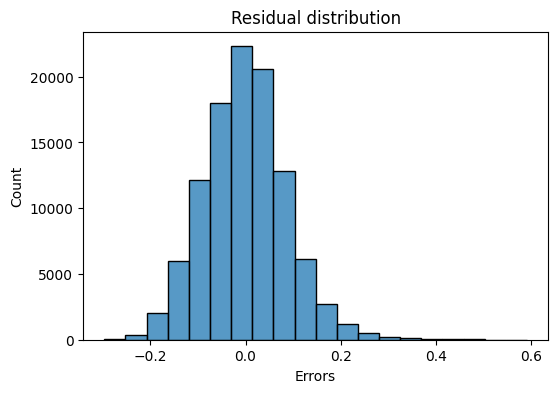

In [44]:
# Make predictions
y_train_predicted = lm.predict(X_train_scaled_with_const)
print(y_train_predicted.shape)

# Plot the histogram of the error terms
fig = plt.figure(figsize=(6, 4))
sns.histplot((y_train_scaled - y_train_predicted), bins = 20)
plt.xlabel('Errors')
plt.title('Residual distribution')
plt.show()

# The error terms are following natural distribution and mean is 0. So this looks right
# We need to check how to improve the R-squared value

In [45]:
# Find results for evaluation metrics

# Running RFE
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train_scaled, y_train_scaled)
print('RFE results')
rfe_results = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
for i in rfe_results:
    print(i)
print('----------------------------------------------------')

# Select columns based on RFE recommendation
selected_columns = X_train_scaled.columns[rfe.support_]
print('selected_columns')
print(selected_columns)
print('----------------------------------------------------')

not_selected_columns = X_train_scaled.columns[~rfe.support_]
print('not_selected_columns')
print(not_selected_columns)
print('----------------------------------------------------')



RFE results
('market_id', np.True_, np.int64(1))
('store_primary_category', np.False_, np.int64(5))
('order_protocol', np.True_, np.int64(1))
('total_items', np.False_, np.int64(3))
('subtotal', np.True_, np.int64(1))
('num_distinct_items', np.True_, np.int64(1))
('max_item_price', np.True_, np.int64(1))
('total_outstanding_orders', np.True_, np.int64(1))
('distance', np.True_, np.int64(1))
('created_at_hour', np.False_, np.int64(4))
('created_at_dayofweek', np.False_, np.int64(2))
('isWeekend', np.True_, np.int64(1))
----------------------------------------------------
selected_columns
Index(['market_id', 'order_protocol', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_outstanding_orders', 'distance', 'isWeekend'],
      dtype='object')
----------------------------------------------------
not_selected_columns
Index(['store_primary_category', 'total_items', 'created_at_hour',
       'created_at_dayofweek'],
      dtype='object')
--------------------------------------

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [46]:
# Loop through the number of features and test the model

# Now we need to eliminate below columns one-by-one and check the model
  # 'store_primary_category'
  # 'total_items'
  # 'created_at_hour'
  # 'created_at_dayofweek'

# Creating dataframe with RFE selected variables
X_train_rfe = X_train_scaled[[
                              'market_id',
                              'order_protocol',
                              'subtotal',
                              'num_distinct_items',
                              # 'max_item_price',
                              'total_outstanding_orders',
                              'distance',
                              'isWeekend',
                              # 'store_primary_category',
                              # 'total_items',
                              # 'created_at_hour',
                              'created_at_dayofweek'
                             ]]

# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train_scaled, X_train_rfe).fit()
print(lm.summary())

# distance  - R-squared: 0.272
# total_outstanding_orders - R-squared: 0.458
# created_at_hour - R-squared: 0.464
# isWeekend - R-squared: 0.478
# created_at_dayofweek - R-squared: 0.484
# max_item_price - R-squared: 0.494
# store_primary_category - R-squared: 0.494

# --------------------------------------------------------------------------
# Removing below columns makes no significant difference to the R-squared value
# Removing any other feature variable reduces the R-squared value
# The coefficient of created_at_hour is very low, so removing created_at_hour
# ----------------------------------------------------------------------------
 # 'max_item_price',
 # 'store_primary_category',
 # 'total_items',
 # 'created_at_hour'

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:51:07   Log-Likelihood:             1.0358e+05
No. Observations:              105442   AIC:                        -2.071e+05
Df Residuals:                  105433   BIC:                        -2.070e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [47]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

# The multicovariance are below 5, so its acceptable

                   Features    VIF
0                     const  22.42
7                 isWeekend   2.81
8      created_at_dayofweek   2.81
3                  subtotal   1.72
4        num_distinct_items   1.68
5  total_outstanding_orders   1.06
2            order_protocol   1.03
1                 market_id   1.01
6                  distance   1.00


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                 1.712e+04
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:51:07   Log-Likelihood:             1.2112e+05
No. Observations:              123043   AIC:                        -2.422e+05
Df Residuals:                  123034   BIC:                        -2.421e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

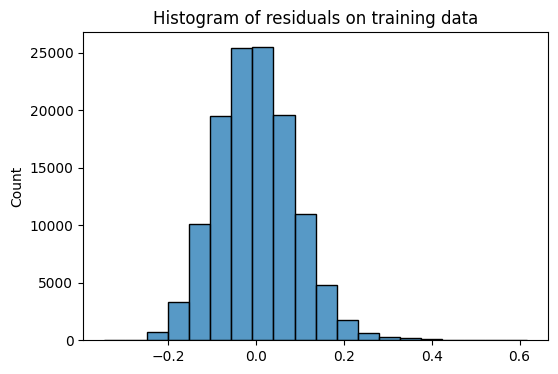

In [48]:
# Build the final model with selected number of features

# Above model is my final model

# Selected feature sets are
  # 'market_id',
  # 'order_protocol',
  # 'subtotal',
  # 'num_distinct_items',
  # 'total_outstanding_orders',
  # 'distance',
  # 'isWeekend',
  # 'created_at_dayofweek'

# NOT selected feature sets are
 # 'max_item_price',
 # 'store_primary_category',
 # 'total_items',
 # 'created_at_hour'

# We need to scale again on the final selected numerical features
# We need to scale the target variable along with the numeric feature variables
final_selected_features = [
    'market_id', 'order_protocol', 'subtotal',
    'num_distinct_items', 'total_outstanding_orders',
    'distance', 'isWeekend', 'created_at_dayofweek'
]
final_numerical_columns_with_target_var = [
    'time_taken', 'subtotal','num_distinct_items','total_outstanding_orders','distance'
]
final_numerical_columns_without_target_var = [
    'subtotal','num_distinct_items','total_outstanding_orders','distance'
]

df_train = X_train.copy()
df_train['time_taken'] = y_train.copy()
df_train = df_train[final_selected_features + ['time_taken']]

# Scale the training data again on the selected features
scaler = MinMaxScaler()
df_train[final_numerical_columns_with_target_var] = scaler.fit_transform(df_train[final_numerical_columns_with_target_var])

y_train_scaled = df_train.pop('time_taken')
X_train_scaled = df_train

# Initialize model
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
lm = sm.OLS(y_train_scaled, X_train_scaled_with_const).fit()
print(lm.summary())

y_train_predicted = lm.predict(X_train_scaled_with_const)

# Plot the histogram of the error terms
fig = plt.figure(figsize=(6, 4))
sns.histplot((y_train_scaled - y_train_predicted), bins = 20)
plt.title('Histogram of residuals on training data')
plt.show()

# Use the same scaler to scale the test data set
df_test = X_test.copy()
df_test['time_taken'] = y_test.copy()
df_test = df_test[final_selected_features + ['time_taken']]
df_test[final_numerical_columns_with_target_var] = scaler.transform(df_test[final_numerical_columns_with_target_var])

y_test_scaled = df_test.pop('time_taken')
X_test_scaled = df_test

# 2. Add constant
X_test_scaled = sm.add_constant(X_test_scaled)

# 3. Predict using the existing model
y_test_predicted = lm.predict(X_test_scaled)


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

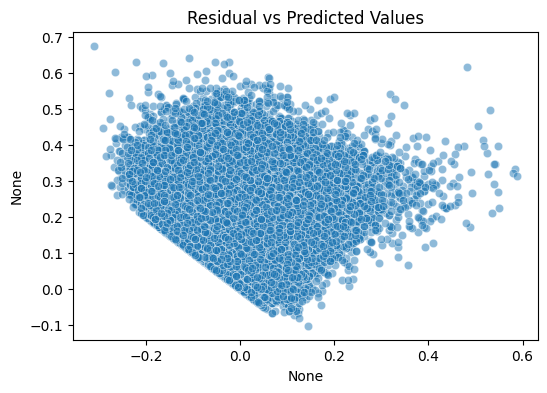

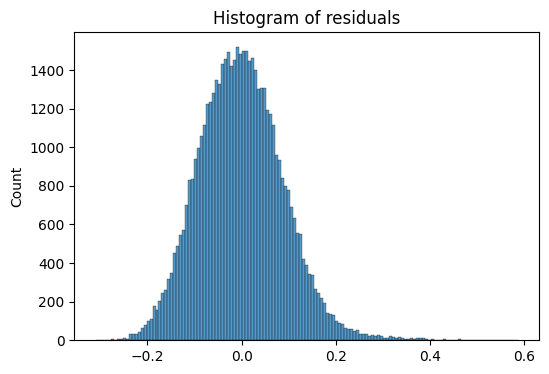

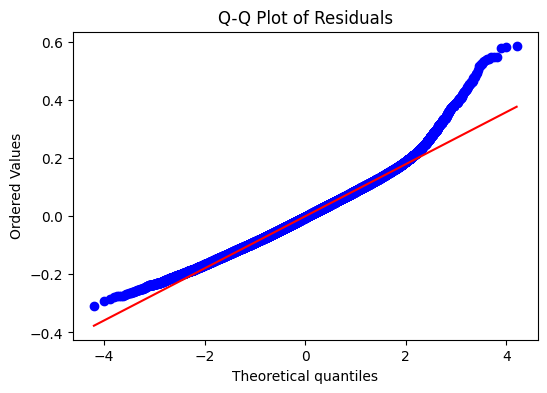

In [49]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Residuals vs Predicted values
import scipy.stats as stats
residuals = y_test_scaled - y_test_predicted

fig = plt.figure(figsize=(6, 4))
sns.scatterplot(x=residuals, y=y_test_predicted, alpha=0.5)
plt.title('Residual vs Predicted Values')
plt.show()

# Plot the histogram of the error terms
fig = plt.figure(figsize=(6, 4))
sns.histplot(residuals)
plt.title('Histogram of residuals')
plt.show()

# Q-Q plot of residuals
fig = plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

[Your inferences here:]

Both, the residual histogram and Q-Q plots indicate that the errors follow a normal distribution with mean as 0. The R-Squared value of 0.52 indicates that 52% of the variation can be explained. All the columns selected have p-value of 0 which means these are significant values. The VIF indicates that multicollinearity is under permissible limits.   

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [50]:
# Compare the scaled vs unscaled features used in the final model

# Refit model on unscaled features
X_train_unscaled = sm.add_constant(X_train[final_selected_features])
model_unscaled = sm.OLS(y_train, X_train_unscaled).fit()

# Extract coefficients
scaled_coefs = pd.Series(lm.params[1:], index=final_selected_features)
unscaled_coefs = pd.Series(model_unscaled.params[1:], index=final_selected_features)

print('Coefficients for scaled data set')
print(scaled_coefs)
print()
print('Coefficients for unscaled data set')
print(unscaled_coefs)

Coefficients for scaled data set
market_id                  -0.010794
order_protocol             -0.014290
subtotal                    0.551312
num_distinct_items          0.119947
total_outstanding_orders    0.248376
distance                    0.545700
isWeekend                   0.059460
created_at_dayofweek       -0.011377
dtype: float64

Coefficients for unscaled data set
market_id                  -0.766350
order_protocol             -1.014604
subtotal                    0.001461
num_distinct_items          0.448221
total_outstanding_orders    0.061020
distance                    0.463898
isWeekend                   4.221654
created_at_dayofweek       -0.807791
dtype: float64


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [51]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Analyzing the effect of a unit change in 'distance' feature. This is because I have choosen to eliminate the feature 'total_items'

# Get the coefficient of 'distance'
scaled_coef = lm.params['distance']

# Get the actual min and max values of 'distance' from training data
min_val = X_train['distance'].min()
max_val = X_train['distance'].max()
range_val = max_val - min_val

# Convert scaled coefficient to per-unit-change
unit_effect = scaled_coef / range_val

# 4. Display the results
print(f"Coefficient = {scaled_coef}")
print(f"min_val = {min_val}, max_val = {max_val} (range: {range_val})")
print(f"Effect on delivery time per unit increase in distance: {unit_effect} minutes")

Coefficient = 0.5457002876618022
min_val = 0.0, max_val = 83.52 (range: 83.52)
Effect on delivery time per unit increase in distance: 0.006533767812042651 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

Yes, the dataset contains several categorical columns. Some of these are derived from existing fields such as created_at, actual_delivery_time, market_id, store_primary_category, order_protocol, created_at_hour, created_at_dayofweek, and isWeekend.

In our analysis of the relationship between target variables and categories, we identified the most influential categorical variables affecting the dependent variable as market_id, order_protocol, isWeekend, and created_at_dayofweek.

It is important to note that categorical variables were excluded from the scaling process.

Analysis

Histograms of categorical columns reveal distinct patterns. For instance, created_at_hour shows higher order counts in the early mornings and late evenings, while created_at_dayofweek highlights increased orders on Saturdays and Sundays.

The Variance Inflation Factor (VIF) for all categorical variables is below 2.

Model coefficients remain consistent and comparable between scaled and unscaled versions.

Among these, market_id and order_protocol exhibit higher coefficients relative to the other variables.





---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

test_size = 0.2 represents an 80-20 split of the dataset into training and testing sets.

80% of the data is allocated for training the model (TRAIN set).

The remaining 20% is reserved for validating/evaluating the model (TEST set).



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**

From the training dataset, distance shows the strongest correlation with time_taken at 0.459712.

distance: 0.459712

subtotal: 0.412878

total_outstanding_orders: 0.381642



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

I applied the Interquartile Range (IQR) method. First, Q1 (25th percentile) and Q3 (75th percentile) were calculated.
The IQR was then determined as (Q3 – Q1).

Next, the lower and upper limits were established as:

lower_ceiling = Q1 – (1.5 × IQR)

higher_ceiling = Q3 + (1.5 × IQR)

Finally, all numeric columns were iterated through, and the dataframe was filtered to retain only the values falling within these limits.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

Based on the coefficients from the scaled data in the final model, the following are the top three features with the greatest influence on time_taken per unit change:

subtotal: 0.5513

distance: 0.5457

total_outstanding_orders: 0.2484



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

A linear regression model seeks to describe the relationship between a dependent variable and one or more independent variables using a straight line. When there is just one independent variable, it is termed simple linear regression; with multiple independent variables, it is referred to as multiple linear regression.

At least one predictor must have a linear relationship with the target variable. The main goal of linear regression is to predict values of the target variable using a line that minimizes the Residual Sum of Squares (RSS), also known as the best-fitting line or least cost function.

The target variable is expressed through the equation of the best-fit line:
y = β₀ + β₁X₁ + β₂X₂ + β₃X₃ …

β₀ represents the intercept

βx are the coefficients of the predictor variables

Model performance is assessed using metrics such as p-value, R-squared, and the F-statistic.

Key considerations include overfitting, multicollinearity, and feature selection. Additionally, the dataset should satisfy assumptions such as normally distributed error terms, mean equal to zero, constant variance, and independence among predictor variables.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple Linear Regression (SLR)

In simple linear regression, there is only one independent variable used to predict the dependent variable.

The relationship is represented by the equation:
y = β₀ + β₁X₁

It is straightforward, as it only measures how one predictor impacts the target variable.

Multiple Linear Regression (MLR)

In multiple linear regression, two or more independent variables are used to explain the dependent variable.

The equation looks like this:
y = β₀ + β₁X₁ + β₂X₂ + β₃X₃ …

Because multiple predictors are involved, additional steps are required:

RFE (Recursive Feature Elimination): To identify and retain only the most significant variables.

VIF (Variance Inflation Factor): To check for multicollinearity and ensure that independent variables do not strongly affect each other.

Scaling: To bring all features to comparable ranges so that coefficients are not biased due to differing units.

Common Assumptions (Apply to Both SLR & MLR)

Error terms should follow a normal distribution.

Mean of error terms should be 0.

Variance of errors should remain constant (homoscedasticity).

Predictor variables should be independent of each other.

In summary, SLR is simpler with one predictor, while MLR uses multiple predictors but requires additional checks (RFE, VIF, scaling) to ensure accuracy and validity.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

Minimizing the cost function is essential to determine the best-fitting line. One common approach is to minimize the Residual Sum of Squares (RSS).

If we define the error as:

 error = y(actual) – y(predicted)<br>

then RSS = error1^2 + error2^2 + error3^2 + error4^2<br>
The goal is to identify the optimal intercept and coefficients such that RSS is minimized. Libraries like statsmodels or scikit-learn are commonly used to calculate these values.

To evaluate the model, we rely on certain metrics:

R-Squared (R²):

R-Square = 1 – (RSS/TSS)

where TSS is total sum of squares

RSE = SQRT(RSS/(n-2))
MSE = RSS/n





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Overfitting

Occurs when the model becomes too complex by adding too many variables or features.

Instead of learning general patterns, the model starts memorizing the training data.

This results in very high training accuracy but poor test accuracy, since the model cannot generalize to unseen data.

An overfit model often shows a very high R-squared value on the training set, which is misleading because it does not actually perform well in prediction.

Underfitting

The opposite of overfitting, underfitting happens when the model is too simple to capture the underlying patterns in the data.

As a result, it fails to achieve good accuracy on both the training set and the test set.

The R-squared value remains low for both, showing that the model is not explaining much variance in the target variable.  




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

1. Linearity Check

In linear regression, we assume a linear relationship between predictors and the target variable.

If the residual plot shows random scatter around zero, this assumption holds.

If there’s a clear curve/pattern, it suggests the relationship is not linear → the model is misspecified.

2. Constant Variance (Homoscedasticity)

Another assumption is that residuals have constant variance across all fitted values.

If the spread of residuals increases or decreases (funnel shape), it indicates heteroscedasticity, meaning errors vary across predictions.

3. Independence of Errors

Residuals should not display any systematic pattern (like trends or clustering).

Patterns may indicate autocorrelation or that some important variable is missing.

4. Normality of Errors

While not directly shown in a residual vs. fitted plot, residual plots combined with histograms or Q-Q plots help check if residuals are normally distributed, which is an assumption for hypothesis testing in regression.